<a href="https://colab.research.google.com/github/KamauDennis/datascience_projects/blob/master/Face_detector_and_Age_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Face Detector and Age Estimator
The main aim of this project is to estimate the age of one or more people in a still image or from a real time camera feed.I'll be using opencv for face detection and then later apply age detection model,that I had trained earlier,to estimate the age of each and every detected face.

Let me begin by importing the libraries that I will be using for this project:


In [ ]:
%matplotlib inline
import cv2
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

For illustration purposes I will use an image from Vikings valhalla tv series that has multiple images of the series characters.I downloaded the image and later saved it at my google drive storage.Let me first load the image and then visualize it:

In [ ]:
#mounting google drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


(-0.5, 1421.5, 749.5, -0.5)

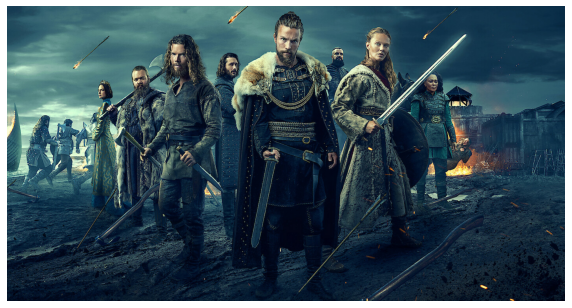

In [ ]:
img_path = 'drive/MyDrive/Datasets/vikings2.jpg'
img = tf.io.read_file(img_path)
img = tf.io.decode_jpeg(img,channels=3)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')

The first step of the program is to read an image from a given file path or capture camera frames from a camera such as webcam.To detect the faces in the frame or image,I will use the haarcascade classifier from OpenCv.

Let me first write a function that loads an image or captures camera frames,detects a face and draws a rectangle around the detected face.The function takes filename of the still image or the cameras device index.

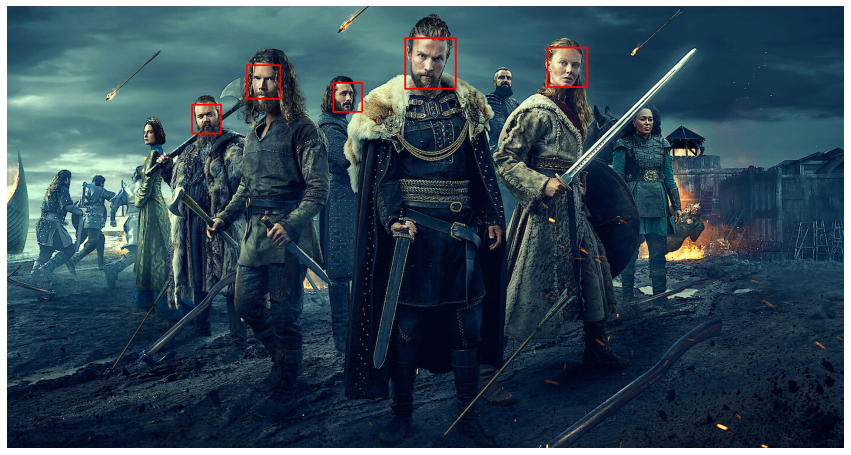

In [ ]:
#detecting faces
def detect(x):
    face_cascade = cv2.CascadeClassifier('drive/MyDrive/cascades/haarcascade_frontalface_default.xml')
    #if the camera device index is given as an argument
    if type(x) is int:
      camera = cv2.VideoCapture(x)
      while (True):
          ret,frame = camera.read()
          gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)#face detection happens in grayscale format
          faces = face_cascade.detectMultiScale(gray,1.3,5)
          for (x,y,w,h) in faces:
              img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
              roi_gray = gray[y:y+h,x:x+w]                  
          cv2.imshow("camera",frame)
          if cv2.waitKey(84) & 0xff == ord("q"):
              break
      camera.release() 
      cv2.destroyAllWindows() 

    else:       
      img = cv2.imread(x)
      img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
      gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
      faces = face_cascade.detectMultiScale(gray,1.3,3)
      for (x,y,w,h) in faces:
          img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

      plt.figure(figsize=(15,15))     
      plt.imshow(img)
      plt.axis('off')
    
detect(img_path) 

Face cascade detector successfully detects five faces from the image although not state of the art.

My next step is to estimate the age of detected face.Let me first load the tensorflow model that I had trained from my google drive storage.

In [ ]:
#loading model
model_path = 'drive/MyDrive/age_detector_model/0001' 
age_detector_model = tf.saved_model.load(model_path)

In [ ]:
def preprocess(img):
  img_res = cv2.resize(img,(200,200))
  img_tensor = tf.convert_to_tensor(img_res,dtype=tf.float32)
  img_exp = tf.expand_dims(img_tensor,0)
  return img_exp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


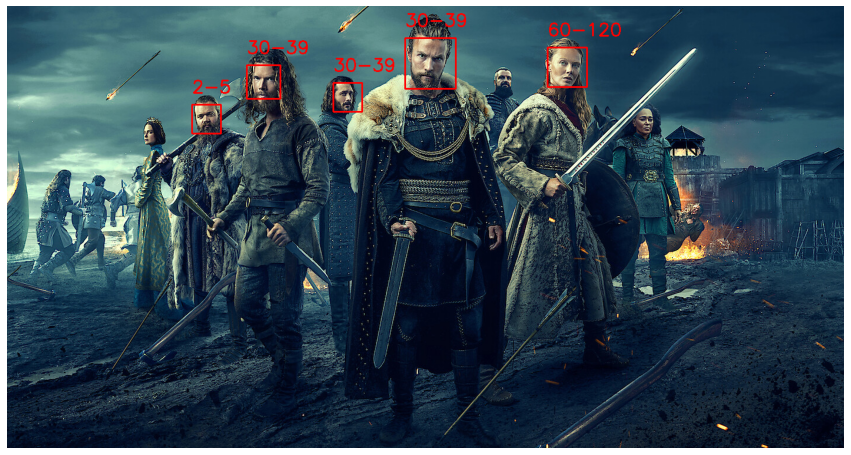

In [ ]:
#detecting faces and detecting age
def detect(x):
    class_names = np.array(['0-1','2-5','6-12','13-19','20-29','30-39','40-59','60-120'])
    face_cascade = cv2.CascadeClassifier('drive/MyDrive/cascades/haarcascade_frontalface_default.xml')
    #if the camera device index is given as an argument
    if type(x) is int:
      camera = cv2.VideoCapture(x)
      while (True):
          ret,frame = camera.read()
          gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)#face detection happens in grayscale format
          faces = face_cascade.detectMultiScale(gray,1.3,5)
          for (x,y,w,h) in faces:
              img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
              roi_gray = gray[y:y+h,x:x+w]  
              prep_roi = preprocess(roi_gray)
              #adding age detector model
              pred = age_detector_model(prep_roi)
              label = class_names[tf.argmax(pred,1)]
              cv2.putText(img,label,(x,y-20),cv2.FONT_HERSHEY_SIMPLEX,1,255,2)                              
          cv2.imshow("camera",frame)
          if cv2.waitKey(84) & 0xff == ord("q"):
              break
      camera.release() 
      cv2.destroyAllWindows() 

    else:       
      img = cv2.imread(x)
      img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
      gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
      faces = face_cascade.detectMultiScale(gray,1.3,3)
      for (x,y,w,h) in faces:
          img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
          roi = img[y:y+h,x:x+w]
          prep_roi = preprocess(roi)
          pred = age_detector_model(prep_roi)
          label = class_names[tf.argmax(pred,1)]
          cv2.putText(img,label,(x,y-20),cv2.FONT_HERSHEY_SIMPLEX,1,255,2)
      plt.figure(figsize=(15,15))     
      plt.imshow(img)
      plt.axis('off')
    
detect(img_path) 

To use webcam I only need to pass the camera's device index which should be 0.